# Extração de características

As características que são extraídas dos dados dependem de sua natureza. Os dados EMG são sinais elétricos coletados dentro de um período de tempo, portanto são dados no domínio do tempo. As características deste domínio são extraídas dele. Porém, também é possível transformar os dados EMG para o domínio da frequência e extrair características também neste domínio. Existem diversas características que podem ser extraídas de cada domínio, entretando nem todas elas serão relevantes. Cada problema se beneficia de características ou combinações de características diferentes. Portanto, é preciso que haja uma seleção de características para encontrar a combinação de características que trará melhor resultado na posterior classificação dos dados.

##  Reutilizando os passos anteriores

É necessário carregar os dados pré-processados, para dar início à extração de características. No `jupyter notebook` podemos utilizar o *namespace* completo de outro *notebook*:

(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 2, 20000)
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=20000
    Range : 0 ... 19999 =      0.000 ...     5.000 secs
Ready.
Creating RawArray with float64 dat

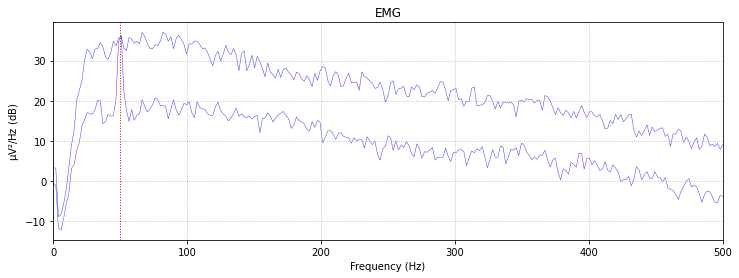

Gráfico de PSD filtrado (notch):


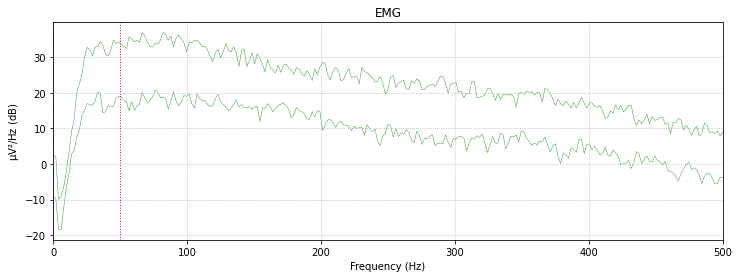

Gráfico de PSD filtrado (bandpass) final:


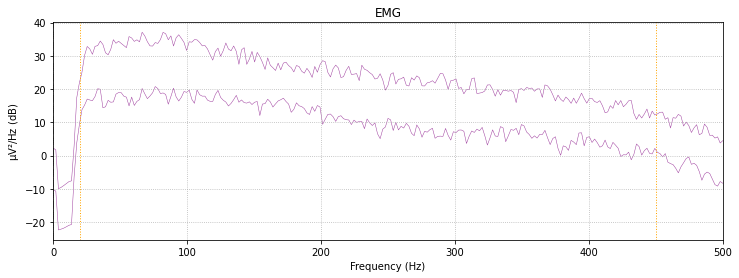


Organização dos dados imediatamente após os filtros:

[<RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>, <RawArray | 2 x 20000 (5.0 s), ~320 kB, data loaded>] 10

Formato em numpy.array: (10, 2, 20000)

Formato dos eventos: (10, 3) 

Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped

Objeto EpochArray: <EpochsArray |  10 events (all good), 0 - 4.99975 sec, baseline off, ~3.1 MB, data loaded,
 '0': 1
 '1': 1
 '2': 1
 '3': 1
 '4': 1
 '5': 1
 '6': 1
 '7': 1
 '8': 

In [1]:
%run 03-Preprocessing.ipynb

Uma característica é uma propriedade individual mensurável ou característica de um fenômeno que está sendo observado. Em EMG, uma característica pode ser extraída no domínio do tempo ou no domínio da frequência. As características a seguir foram retiradas do artigo *EMG Feature Extraction for Tolerance of White Gaussian Noise* \[1\].

### Domínio do tempo

1. Willison Amplitude (WAMP)

    > $ \sum_{i=1}^{N-1}f(|x_i - x_{i+1}|) \\$
    $ sgn(x) = \begin{cases} 1 & \text{if } x \geq threshold \\ 0 & \text{otherwise} \end{cases} $

2. Variance of EMG (VAR-E)

    > $ \frac{1}{N-1}\sum_{i=1}^{N}x_i^2 $

3. Root Mean Square (RMS)

    > $ \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}|x_i|^2} $

4. Waveform Length (WL)
    
    > $ \sum_{i=1}^{N-1}|x_{i+1} - x_i| $

5. Zero Crossing (ZC)

    > $ \sum_{i=1}^{N-1}[sgn(x_i x_{i+1}) \cap |x_i - x_{i+1}| \geq threshold] \\$
    $ sgn(x) = \begin{cases} 1 & \text{if } x \geq threshold \\ 0 & \text{otherwise} \end{cases} $

### Domínio da frequência

1. Auto Regressive (AR)

    > $ - \sum_{j=1}^{\rho}\alpha_j x_{j-1} + w_n $

2. Median Frequency (FMD)

    > $ \frac{1}{2}\sum_{j=1}^{M}PSD_j $

3. Mean Frequency (FMN)

    > $ \sum_{j=1}^{M}f_j PSD_j \Big{ / } \sum_{j=1}^{M}PSD_j $

4. Modified Median Frequency (MMDF)

    > $ \frac{1}{2}\sum_{i=1}^{M}A_j $


\[1\] Phinyomark, Angkoon & Limsakul, Chusak & Phukpattaranont, P.. (2008). EMG Feature Extraction for Tolerance of White Gaussian Noise.
[Disponível neste link](https://www.researchgate.net/publication/263765853_EMG_Feature_Extraction_for_Tolerance_of_White_Gaussian_Noise)

**Desafio 1**: Descrever as características de acordo com o artigo citado e outros disponíveis relacionados. O que está querendo "ser visto" em cada característica? Qual é o significado matemático de cada uma delas?

### Extraindo características

É necessário implementar as características, geralmente em formato de funções ou métodos, para que seja possível aplicar tais funções aos dados de entrada e obter as características resultantes. A seguir temos a implementação das características VAR & RMS (domínio do tempo) e FDM & MMDF (domínio da frequência).

In [12]:
from math import prod

# funções auxiliares
def PSD(w):
    ''' definição da função PSD para o sinal no domínio da frequência '''
    return np.sqrt(np.abs(w))


# funções de extração de características

def var(x):
    return np.sum(x ** 2, axis=-1) / (np.prod(x.shape[:-1]) - 1)

def rms(x):
    return np.sqrt(np.sum(np.abs(x) ** 2, axis=-1) / (np.prod(x.shape[:-1]) - 1))

def wl(x):
    return sum([abs(x[:,:,:,i+1] - x[:,:,:,i]) for i in range(x.shape[-1] - 1)])

def fmd(w):
    return np.sum(PSD(w), axis=-1) / 2

def mmdf(w):
    return np.sum(np.abs(w), axis=-1) / 2

## Vetor de características

Ao final da implementação e seleção das características, deve ser escolhida as características e então teremos um vetor com todas elas impementadas.

O vetor de características estará organizado da seguinte forma (exemplo p/ VAR, RMS, RDM e MMDF):

| ID sample | VAR1 | RMS1 | FMD1 | MMDF1 | VAR2 | RMS2 | FMD2 | MMDF2 | ... | MMDF8 | Classe |
|:---------:|:----:|:----:|:----:|:-----:|------|------|------|-------|-----|-------|:------:|
|     1     |  v1  |  v1  |  v1  |   v1  | v1   | v1   | v1   | v1    | v1  | v1    |    0   |
|     2     |  v2  |  v2  |  v2  |   v2  | v2   | v2   | v2   | v2    | v2  | v2    |    0   |
|    ...    |  ... |  ... |  ... |  ...  | ...  | ...  | ...  | ...   | ... | ...   |   ...  |
|     N     |  vN  |  vN  |  vN  |   vN  | vN   | vN   | vN   | vN    | vN  | vN    |    7   |

**Desafio 2**: Implemente todas as características apresentadas neste tutorial em formato de funções. Sinta-se livre também para buscar e implementar características EMG além das apresentadas, citando as fontes de tais características.

### Seleção de características

In [14]:
functions = ('var', 'rms', 'wl', 'fmd', 'mmdf')

final_data = list()
final_data.append(var(chunks_time))
final_data.append(rms(chunks_time))
final_data.append(wl(chunks_time))
final_data.append(fmd(chunks_freq))
final_data.append(mmdf(chunks_freq))

final_data = np.array(final_data)
print('Final data shape:', final_data.shape)

Final data shape: (5, 10, 2, 41)


**Desafio 3**: Criar um vetor de características, no qual o shape seja 410x18 (nº de amostras, nº de características). Este vetor será utilizado na próxima etapa de seleção (automática) de características e classificação.